In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'        # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
# ① 直接读我们昨天保存的特征 CSV
feat_df = pd.read_csv(r'E:\miniconda\ChineseSuperLeague\data\features.csv')

# ② 特征 + 标签
X = feat_df[['home_last3_goals', 'away_last3_concede', 'home_last2_loss']]
y = (feat_df['result'] == 'H').astype(int)   # 主胜=1，其他=0

print(f'数据规模：{X.shape[0]} 行 × {X.shape[1]} 列')
print('标签分布：'); print(y.value_counts())

数据规模：172 行 × 3 列
标签分布：
result
0    145
1     27
Name: count, dtype: int64


✅ 逻辑回归准确率：91.43%


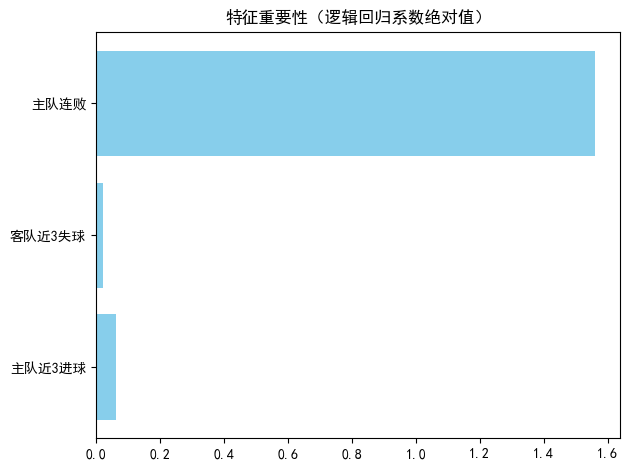

In [5]:
# ③ 拆分 + 训练
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# ④ 评估
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'✅ 逻辑回归准确率：{acc:.2%}')

# ⑤ 特征重要性
importance = abs(clf.coef_[0])
plt.barh(['主队近3进球', '客队近3失球', '主队连败'], importance, color='skyblue')
plt.title('特征重要性（逻辑回归系数绝对值）')
plt.tight_layout(); plt.show()